In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10e050278>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a19440438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10e050f60>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

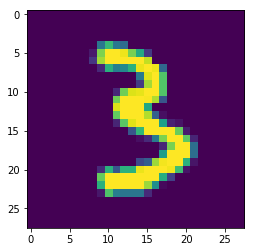

In [10]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 0.74031401 -0.0151518  -0.56528831 ...,  0.53935128  3.22334146
  -1.35941482]
 [ 0.17959122 -0.37564138  0.791623   ...,  0.5466069   0.92906958
  -1.45768428]
 [ 0.20076773  0.80046409 -2.21734619 ..., -1.93038511  0.33605233
  -1.18419611]
 ..., 
 [ 0.14097048  0.96658111  1.55276036 ..., -1.30653596 -1.37778091
   1.18734837]
 [ 0.59109747  0.16498898 -0.17514919 ..., -0.92118275 -0.41922629
  -0.59381378]
 [ 1.47286236  0.7033062  -1.02802503 ...,  0.11529656  1.07893956
   0.48913127]]


In [12]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [13]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [14]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [15]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
c

2162.2146

In [20]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

800